# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("bank-additional-full.csv", sep = ";")

In [4]:
df.shape

(41188, 21)

In [5]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [7]:
df.head(2)

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
df.columns

Index(['age', 'duration', 'y', 'loan_unknown', 'loan_yes', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'housing_unknown', 'housing_yes',
       'contact_telephone', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'campaign_2', 'campaign_3',
       'campaign_4', 'campaign_5', 'campaign_6', 'campaign_7', 'campaign_8',
       'campaign_9', 'campaign_10', 'campaign_11', 'campaign_12',
       'campaign_13', 'campaign_14', 'campaign_15', 'campaign_16',
       'campaign_17', 'campaign_18', 'campaign_19', 'campaign_20',
       'campaign_21', 'campaign_22', 'campaign_23', 'campaign_24',
       'campaign_25', 'campaign_26', 'campaign_27', 'campaign_28',
       'campaign_29', 'campaign_30', 'campaign_31', 'campaign_32',
       'campai

In [9]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

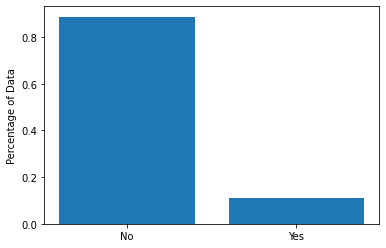

In [10]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

we will SMOTE to create artificial data points for the minority class

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
y_test['yes'].value_counts()

0    10968
1     1389
Name: yes, dtype: int64

In [30]:
# percentage of yes
print(f' Percentage of yes in out test sample is % {round(len(y_test[y_test.yes ==1])/len(y_test)*100,2)}')

 Percentage of yes in out test sample is % 11.24


In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [33]:
round(len(y_train[y_train.yes==1])/len(y_train)*100,2)

11.28

In [34]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [35]:
oversample = SMOTE(random_state=101, k_neighbors=5)
X_SMOTE,y_SMOTE = oversample.fit_resample(X_train,y_train)

In [36]:
###TRANSFORM###

X_scaled = X_SMOTE.copy()
y_train = y_SMOTE.copy()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [37]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 249.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.5\ngini = 0.377\nsamples = 24098\nvalue = [18034, 6064]\nclass = No'),
 Text(0.125, 0.375, 'duration <= 124.5\ngini = 0.454\nsamples = 17025\nvalue = [11100, 5925]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.265\nsamples = 6903\nvalue = [5816, 1087]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.499\nsamples = 10122\nvalue = [5284, 4838]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 0.5\ngini = 0.039\nsamples = 7073\nvalue = [6934, 139]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.033\nsamples = 6997\nvalue = [6881, 116]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.422\nsamples = 76\nvalue = [53, 23]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.5\ngini = 0.402\nsamples = 27062\nvalue = [7546, 19516]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 0.5\ngini = 0.317\nsamples = 22885\nvalue = [4520, 18365]\nclass = Yes'),


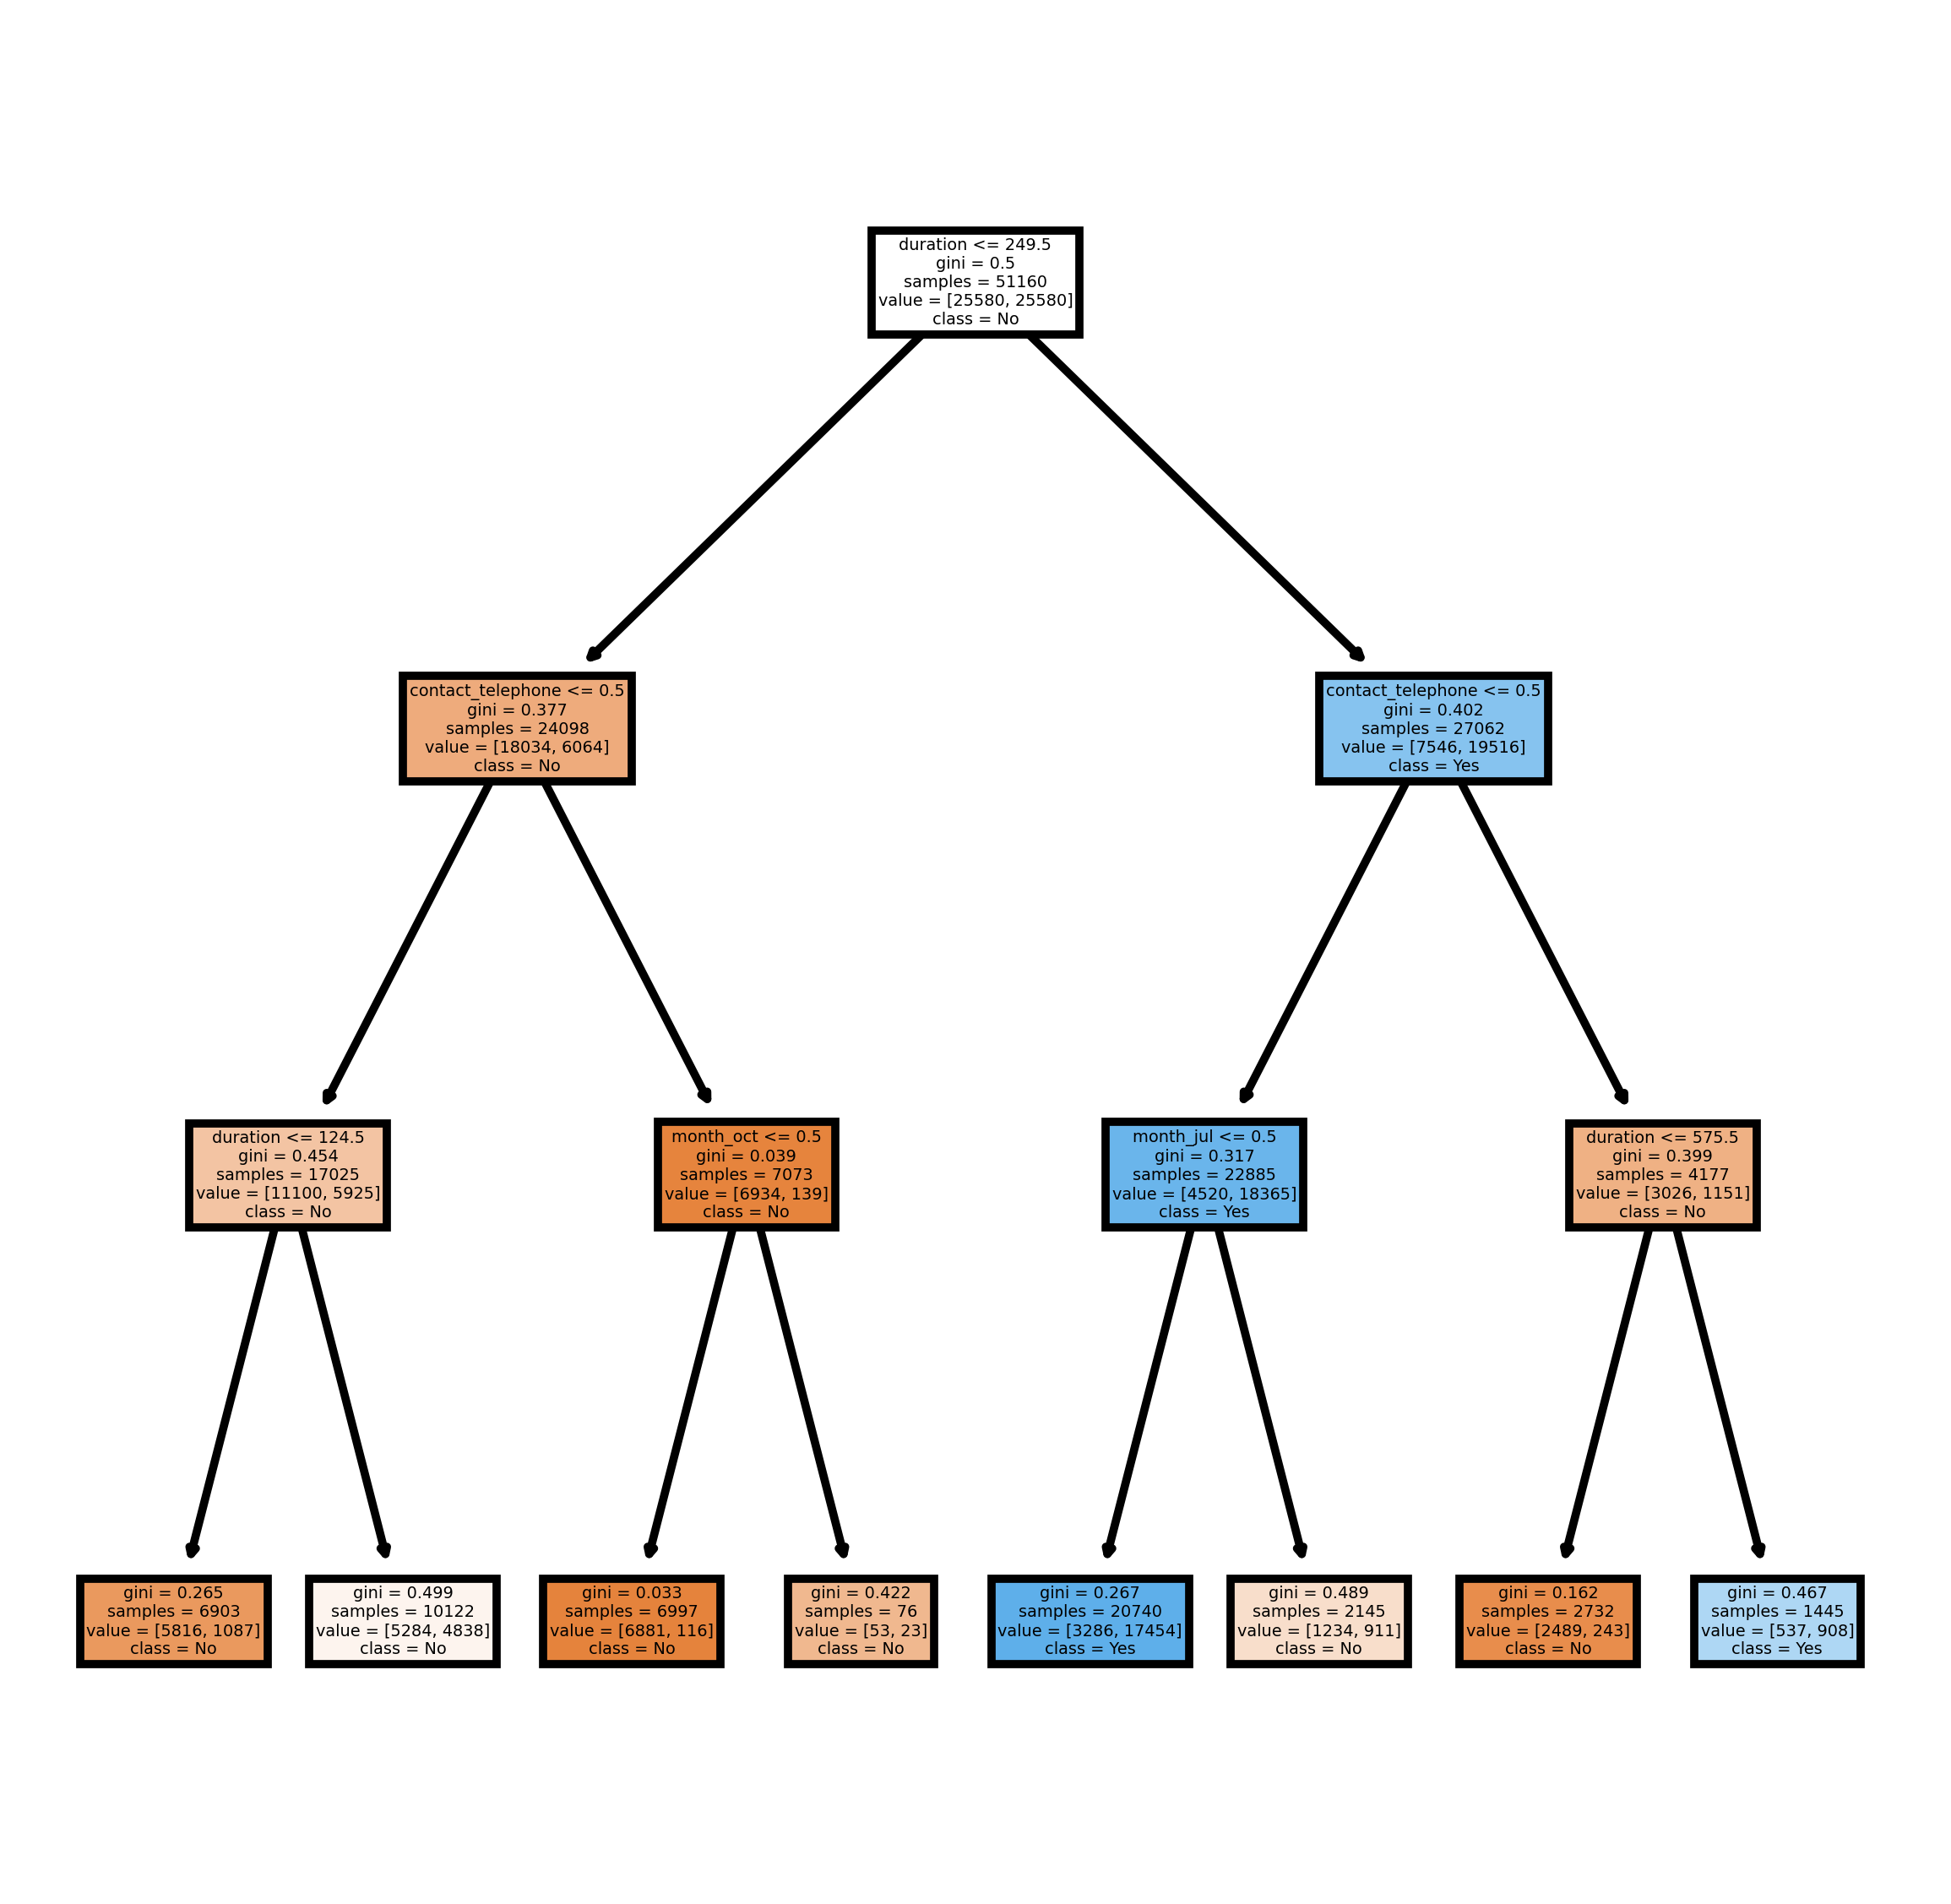

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [39]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
print(f'decision tree accuracy is {round(accuracy_score(y_true, y_pred), 3)}')

decision tree accuracy is 0.888


In [46]:
DT_accuracy = round(accuracy_score(y_true, y_pred), 3)

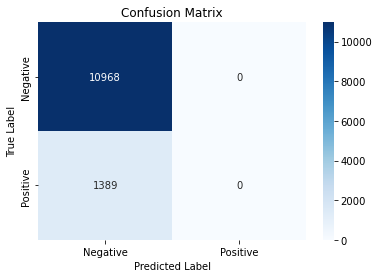

In [40]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [52]:
dtree = DecisionTreeClassifier()

bagging = BaggingClassifier(base_estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy:", accuracy)

C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.888


In [53]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)
BAG_accuracy = round(accuracy_score(y_test, y_pred),3)

C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


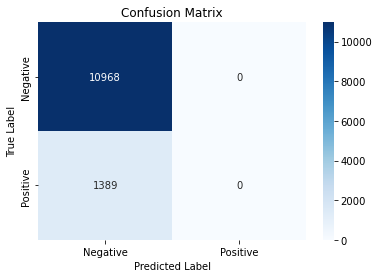

In [54]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
BAG_accuracy

0.888

# 4.) Boost your tree

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1)

In [57]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [58]:
boosting_accuracy = round(accuracy_score(y_test, y_pred),3)
boosting_accuracy

0.887

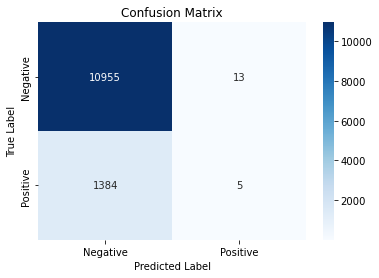

In [59]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [61]:
## meta learner
from sklearn.linear_model import LogisticRegression

####IMPORT MORE BASE LEARNERS####
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC

from mlens.ensemble import SuperLearner

### fit base estimators

In [62]:
### SET YOUR BASE LEARNERS
base_estimators = [RandomForestClassifier(random_state=101),
                   GradientBoostingClassifier(random_state=101),
                   QDA(),
                   KNeighborsClassifier(n_neighbors=5),
                   SVC()]

super_learner = SuperLearner(folds=10, random_state =42)

super_learner.add(base_estimators)

### FIT TO TRAINING DATA

super_learner.fit(X_scaled, y_train)


### GET base_predictions
base_predictions = super_learner.predict(X_scaled)

base_predictions

C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0.]], dtype=float32)

#### TRAIN YOUR METALEARNER

In [63]:
meta = LogisticRegression(fit_intercept = False).fit(base_predictions,y_train)
y_pred = meta.predict(super_learner.predict(X_test))

C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\r-iup\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with featu

#### INTERPRET COEFFICIENTS

In [64]:
meta.coef_

array([[ 1.87364354, -1.32926282, -6.85618307, 14.80733368, -1.03585653]])

The cofficents here represent the assigned weight to each base estimator. for instance the first estimator here is random forest has a cofficient of 1.87 which indicates that the output of the random forest is increase the log likelihood of our logit model by 1.87.  we can see the highest weight was given to knn. Also, we can see that QDA was assigned a negative weight.

Metal Learner Accuracy: 0.8858137088290038


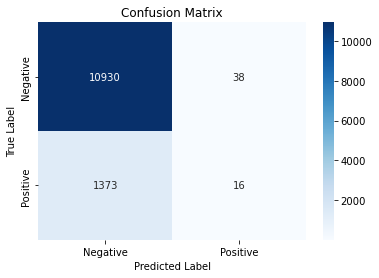

In [65]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
cm_SL = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
print("Metal Learner Accuracy:", accuracy)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_SL, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [66]:
sensitivity1 = cm_SL[0,0]/(cm_SL[0,0]+cm_SL[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm_SL[1,1]/(cm_SL[1,0]+cm_SL[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9965353756382203
Specificity :  0.011519078473722102


In [72]:
# Calculating the sensitivties and specificites of each model

# Decision Tree
sen_raw = cm_raw[0,0]/(cm_raw[0,0]+cm_raw[0,1])
spec_raw = cm_raw[1,1]/(cm_raw[1,0]+cm_raw[1,1])

# Bagging
sen_bag = cm_bag[0,0]/(cm_bag[0,0]+cm_bag[0,1])
spec_bag = cm_bag[1,1]/(cm_bag[1,0]+cm_bag[1,1])

# Boosting
sen_boost = cm_boost[0,0]/(cm_boost[0,0]+cm_boost[0,1])
spec_boost = cm_boost[1,1]/(cm_boost[1,0]+cm_boost[1,1])

# meta Learner
sen_SL = cm_SL[0,0]/(cm_SL[0,0]+cm_SL[0,1])
spec_SL = cm_SL[1,1]/(cm_SL[1,0]+cm_SL[1,1])

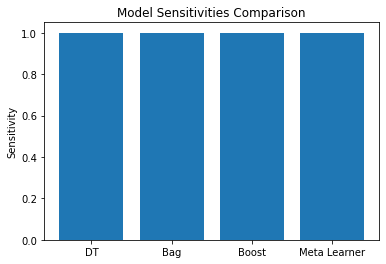

In [73]:
# Sensitivities Bar Chart 
plt.title("Model Sensitivities Comparison")
plt.bar(["DT","Bag","Boost","Meta Learner"],[sen_raw,sen_bag,sen_boost,sen_SL])
plt.ylabel("Sensitivity")
plt.show()

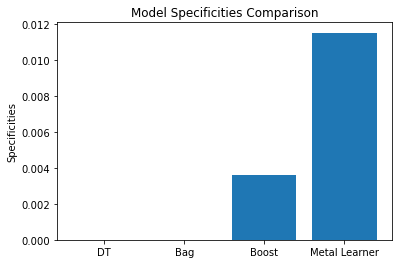

In [74]:
# Specificities Bar Chart 
plt.title("Model Specificities Comparison")
plt.bar(["DT","Bag","Boost","Metal Learner"],[spec_raw,spec_bag,spec_boost,spec_SL])
plt.ylabel("Specificities")
plt.show()

we see that our meta learner despite it has a lower overall accuracy, it made good improvement in our specificities which could be important to our business in prediciting the minority class correctly